ВАЛЮТНЫЕ ПАРЫ

In [36]:
#!pip install pandas==1.3.5
#Доллар США (USD): R01235
#Евро (EUR): R01239
#Японская иена (JPY): R01820
#Британский фунт стерлингов (GBP): R01035
#Швейцарский франк (CHF): R01775
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


slov = {
    'EUR': 'R01239',
    'USD': 'R01239',
    'JPY': 'R01820',
    'GBP': 'R01035',
    'CHF': 'R01775'
}

def get_price(name):
    url = f"https://www.cbr.ru/scripts/XML_dynamic.asp?date_req1=01/01/2018&date_req2=02/04/2024&VAL_NM_RQ={slov[name]}"
    df = pd.read_xml(url)
    return df

df = get_price('GBP')
df.to_csv('exchange_rates.csv', index=False)
df

,Date,Id,Nominal,Value,VunitRate
0,10.01.2018,R01035,1,"77,2122","77,2122"
1,11.01.2018,R01035,1,"76,8644","76,8644"
2,12.01.2018,R01035,1,"76,8188","76,8188"
3,13.01.2018,R01035,1,"76,7465","76,7465"
4,16.01.2018,R01035,1,"77,5076","77,5076"
...,...,...,...,...,...
1531,27.03.2024,R01035,1,"117,0605","117,0605"
1532,28.03.2024,R01035,1,"116,9251","116,9251"
1533,29.03.2024,R01035,1,"116,5187","116,5187"
1534,30.03.2024,R01035,1,"116,6490","116,649"


In [37]:
df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y')

In [38]:
df

,Date,Id,Nominal,Value,VunitRate
0,2018-01-10,R01035,1,"77,2122","77,2122"
1,2018-01-11,R01035,1,"76,8644","76,8644"
2,2018-01-12,R01035,1,"76,8188","76,8188"
3,2018-01-13,R01035,1,"76,7465","76,7465"
4,2018-01-16,R01035,1,"77,5076","77,5076"
...,...,...,...,...,...
1531,2024-03-27,R01035,1,"117,0605","117,0605"
1532,2024-03-28,R01035,1,"116,9251","116,9251"
1533,2024-03-29,R01035,1,"116,5187","116,5187"
1534,2024-03-30,R01035,1,"116,6490","116,649"


In [39]:
df['day'] = df['Date'].apply(lambda x: x.day)
df['month'] = df['Date'].apply(lambda x: x.month)
df['year'] = df['Date'].apply(lambda x: x.year)
df = df.drop(columns=['Id'])
df

,Date,Nominal,Value,VunitRate,day,month,year
0,2018-01-10,1,"77,2122","77,2122",10,1,2018
1,2018-01-11,1,"76,8644","76,8644",11,1,2018
2,2018-01-12,1,"76,8188","76,8188",12,1,2018
3,2018-01-13,1,"76,7465","76,7465",13,1,2018
4,2018-01-16,1,"77,5076","77,5076",16,1,2018
...,...,...,...,...,...,...,...
1531,2024-03-27,1,"117,0605","117,0605",27,3,2024
1532,2024-03-28,1,"116,9251","116,9251",28,3,2024
1533,2024-03-29,1,"116,5187","116,5187",29,3,2024
1534,2024-03-30,1,"116,6490","116,649",30,3,2024


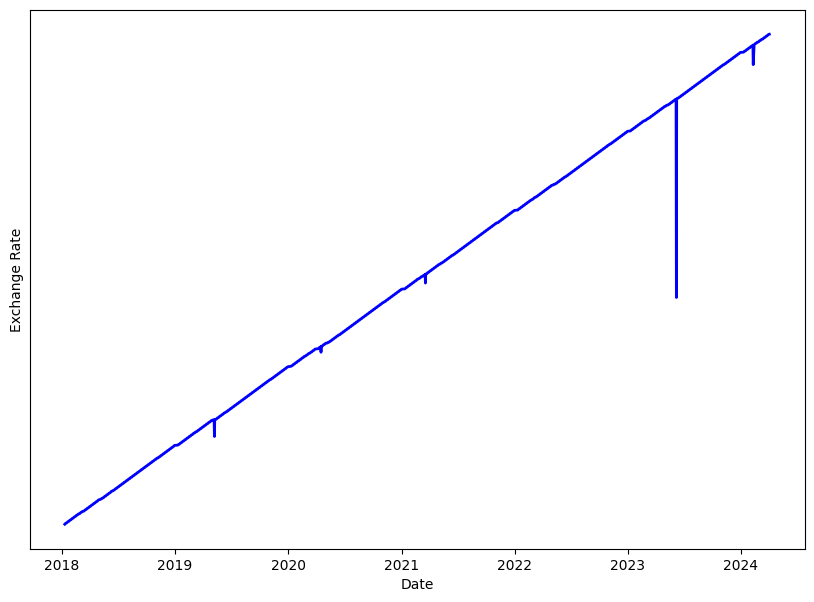

In [46]:
plt.figure(figsize=(10, 7))
plt.plot(df['Date'], df['Value'], color='b', label='CHF Exchange Rate', linewidth=2.0)
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.yticks([])
plt.show()

In [9]:
df['Value'] = df['Value'].apply(lambda x: float(str(x).replace(',', '.')))

In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

str_value_rows = df[df['Value'].apply(lambda x: isinstance(x, str))].index
df = df.drop(str_value_rows)

X = df.drop(columns=['Value'])
y = df['Value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

model = GradientBoostingRegressor()
model.fit(X_train.drop(columns=['Date']), y_train)

predictions = model.predict(X_test.drop(columns=['Date']))
X_test['Predicted_Value'] = predictions
X_test['true_target'] = y_test

r2_score(y_true=y_test, y_pred=predictions)

ValueError: could not convert string to float: '0,363146'

In [ ]:
X_test_chek = X_test.copy()
X_test_chek.set_index('Date', drop=True, append=False, inplace=True, verify_integrity=False)
X_test_chek = X_test_chek.sort_index()
X_test_chek = X_test_chek.reset_index()

АКЦИИ

In [ ]:
import pandas as pd 
import requests
from matplotlib import pyplot as plt

slov = {
        'яндекс': 'YNDX',
        'сбер': 'SBER',
        'роснефть': 'ROSN',
        'лукойл': 'LKOH',
        'газпром': 'GAZP',
        'озон': 'OZON',
        'мос_биржа': 'MOEX',
        'тинькофф': 'TCSG',
        'газпромнефть': 'SIBN'
    }

def get_graph(name):
    url = f"http://iss.moex.com/iss/engines/stock/markets/shares/securities/{slov[name]}/candles.json?from=2023-05-25&till=2024-04-03&interval=24"
    response = requests.get(url)
    data = response.json()
    df2 = pd.DataFrame(data['candles']['data'], columns=data['candles']['columns'])
    return df2

df2 = get_graph('озон')
df2

,open,close,high,low,value,volume,begin,end
0,1804.5,1801.0,1807.5,1753.0,5.701572e+08,320285,2023-05-25 00:00:00,2023-05-25 23:59:59
1,1800.0,1790.0,1805.0,1776.5,3.325014e+08,185615,2023-05-26 00:00:00,2023-05-26 23:59:59
2,1800.0,1803.5,1820.0,1790.0,5.062297e+08,280239,2023-05-29 00:00:00,2023-05-29 23:59:59
3,1786.0,1744.5,1792.0,1700.5,7.110202e+08,402342,2023-05-30 00:00:00,2023-05-30 23:59:59
4,1744.0,1757.5,1773.0,1717.0,2.797892e+08,160001,2023-05-31 00:00:00,2023-05-31 23:59:59
...,...,...,...,...,...,...,...,...
215,3707.0,3794.0,3834.0,3700.0,2.932998e+09,776160,2024-03-28 00:00:00,2024-03-28 23:59:59
216,3810.0,3789.0,3810.0,3707.5,1.887159e+09,502996,2024-03-29 00:00:00,2024-03-29 23:59:59
217,3809.0,3874.5,3904.0,3800.0,2.432160e+09,629448,2024-04-01 00:00:00,2024-04-01 23:59:59
218,3875.0,3845.5,3907.5,3815.0,2.060155e+09,533046,2024-04-02 00:00:00,2024-04-02 23:59:59


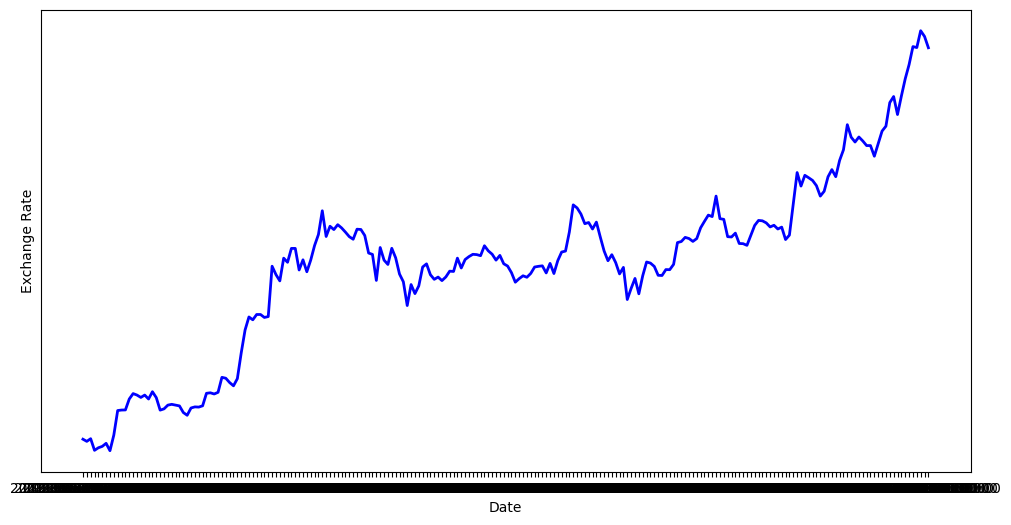

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df2['begin'], df2['close'], color='b', label='CHF Exchange Rate', linewidth=2.0)
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.yticks([])
plt.show()  

In [ ]:
df2['begin'] = pd.to_datetime(df2['begin'], format='%Y-%m-%d %H:%M:%S')
df2['day'] = df2['begin'].apply(lambda x: x.day)
df2['month'] = df2['begin'].apply(lambda x: x.month)
df2['year'] = df2['begin'].apply(lambda x: x.year)
df2 = df2.drop(columns=['end'])
df2

,open,close,high,low,value,volume,begin,day,month,year
0,1804.5,1801.0,1807.5,1753.0,5.701572e+08,320285,2023-05-25,25,5,2023
1,1800.0,1790.0,1805.0,1776.5,3.325014e+08,185615,2023-05-26,26,5,2023
2,1800.0,1803.5,1820.0,1790.0,5.062297e+08,280239,2023-05-29,29,5,2023
3,1786.0,1744.5,1792.0,1700.5,7.110202e+08,402342,2023-05-30,30,5,2023
4,1744.0,1757.5,1773.0,1717.0,2.797892e+08,160001,2023-05-31,31,5,2023
...,...,...,...,...,...,...,...,...,...,...
215,3707.0,3794.0,3834.0,3700.0,2.932998e+09,776160,2024-03-28,28,3,2024
216,3810.0,3789.0,3810.0,3707.5,1.887159e+09,502996,2024-03-29,29,3,2024
217,3809.0,3874.5,3904.0,3800.0,2.432160e+09,629448,2024-04-01,1,4,2024
218,3875.0,3845.5,3907.5,3815.0,2.060155e+09,533046,2024-04-02,2,4,2024


In [ ]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

X = df2.drop(columns=['close'])
y = df2['close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

train_pool = Pool(data=X_train, label=y_train)
test_pool = Pool(data=X_test, label=y_test)

model = CatBoostRegressor()
model.fit(train_pool)

predictions = model.predict(test_pool)

X_test['Predicted_Value'] = predictions
X_test['true_target'] = y_test

last_date = df2['begin'].max()
future_dates = pd.date_range(start=last_date, periods=30, freq='D')[1:]

future_df = pd.DataFrame({'begin': future_dates})

future_close_predictions = model.predict(Pool(data=future_df))

print("R2 Score:", r2_score_value)

ModuleNotFoundError: No module named 'catboost'

СТАВКА ЦБ

In [7]:
import pandas as pd

df2 = pd.read_json('table_data.json')
df2.drop(4)
df2.drop(42)
df2['Date'] = df2[0]
df3 = df2.drop(columns=[0, 2])
df3

,1,Date
0,1600,18 декабря 2023 г.
1,1500,30 октября 2023 г. - 17 декабря 2023 г.
2,1300,18 сентября 2023 г. - 29 октября 2023 г.
3,1200,15 августа 2023 г. - 17 сентября 2023 г.
4,850,24 июля 2023 г. - 14 августа 2023 г.
5,750,19 сентября 2022 г. - 23 июля 2023 г.
6,800,25 июля 2022 г. - 18 сентября 2022 г.
7,950,14 июня 2022 г. - 24 июля 2022 г.
8,1100,27 мая 2022 г. - 13 июня 2022 г.
9,1400,4 мая 2022 г. - 26 мая 2022 г.


In [10]:
df3['price'] = df3[1]
df3 = df3.drop(columns=[1])
df3

KeyError: 1

In [11]:
df3

,Date,price
0,18 декабря 2023 г.,1600
1,30 октября 2023 г. - 17 декабря 2023 г.,1500
2,18 сентября 2023 г. - 29 октября 2023 г.,1300
3,15 августа 2023 г. - 17 сентября 2023 г.,1200
4,24 июля 2023 г. - 14 августа 2023 г.,850
5,19 сентября 2022 г. - 23 июля 2023 г.,750
6,25 июля 2022 г. - 18 сентября 2022 г.,800
7,14 июня 2022 г. - 24 июля 2022 г.,950
8,27 мая 2022 г. - 13 июня 2022 г.,1100
9,4 мая 2022 г. - 26 мая 2022 г.,1400


In [13]:
from datetime import datetime

slov = {
    'января': '01',
    'февраля': '02',
    'марта': '03',
    'апреля': '04',
    'мая': '05',
    'июня': '06',
    'июля': '07',
    'августа': '09',
    'сентября': '09',
    'октября': '10',
    'ноября': '11',
    'декабря': '12'
}


def ivf(date_str):
    date_str = str(date_str)
    for k in slov.keys():
        if k in date_str:
          date_str = date_str.replace(k, str(slov[k]))
          date_str = str(date_str).split('-')[-1]
          date_str = date_str.split('г.')[0]
          date_str = date_str[-5:]

    return date_str



df3['Date'] = list(map(lambda x: ivf(x), df3['Date']))

df3

,Date,price
0,2023,1600
1,2023,1500
2,2023,1300
3,2023,1200
4,2023,850
5,2023,750
6,2022,800
7,2022,950
8,2022,1100
9,2022,1400


In [14]:
df3['price'] = [k / 100 for k in df3['price']]
df3['price']

0     16.00
1     15.00
2     13.00
3     12.00
4      8.50
5      7.50
6      8.00
7      9.50
8     11.00
9     14.00
10    17.00
11    20.00
12     9.50
13     8.50
14     7.50
15     6.75
16     6.50
17     5.50
18     5.00
19     4.50
20     4.25
21     4.50
22     5.50
23     6.00
24     6.25
25     6.50
26     7.00
27     7.25
28     7.50
29     7.75
30     7.50
31     7.25
32     7.50
33     7.75
34     8.25
35     8.50
36     9.00
37     9.25
38     9.75
39    10.00
40    10.50
41    11.00
42    11.50
43    12.50
44    14.00
45    15.00
46    17.00
47    10.50
48     9.50
49     8.00
50     7.50
51     7.00
52     5.50
Name: price, dtype: float64

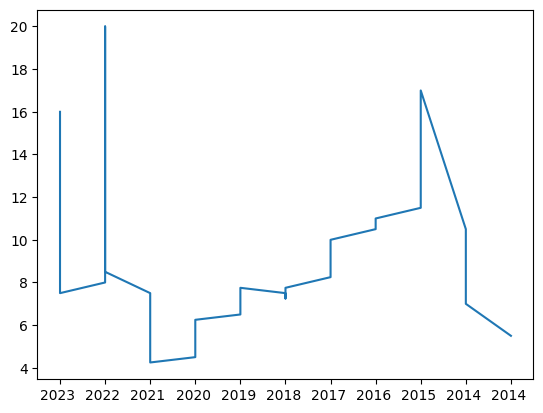

In [16]:
import matplotlib.pyplot as plt

plt.plot(df3['Date'], df3['price'])